In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./files/*.txt")
    return files
textfile=textfile()
textfile

['./files\\2016公司治理.txt',
 './files\\2016短期借款.txt',
 './files\\2016長期借款.txt',
 './files\\2017公司治理.txt',
 './files\\2017短期借款.txt',
 './files\\2017長期借款.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LYDIA\AppData\Local\Temp\jieba.cache
Loading model cost 1.513 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['的','，','年','為','大同','在','與','於','股東','更','年度','已','是否','(',')','關','相關','（','）','有','無','?','等','適用','提供','？','本','股','\uf0fc','千元','$','每','到期日','予','十二月','附','○','日至民國','日起','幣','為民國','106.12','共分','餘額','每期','續','減','三十一日','按','期','日','自民國','民國','期間','間','期至','第','者','除','計','新','：','註','達','月','；','至小數點','第二位']
puncs = '！？｡/＂＃＄$％＆＇()（）( , )＊＋，_－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》.%「」『』【】 〔〕〖〗〘〙〚〛-〜,〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus = []
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    for w in r_list:
        if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
            r_list.remove(w)        
    st=" ".join(r_list)
    corpus.append(st)
corpus

['創新 品質 信賴 公司 致力 能源 節能 之產品 系統 服務 三 大事 業群 從 智慧 電網 智慧 社區 到 智慧 家庭 所 需 之 各 種節 能 高效率 消費 電子 家 電產品 馬 電力 設備 自動 控制 產品 暨 結合資 通訊 技術 之系統 整合 以及 由產 品至 系統 完善 即時 各項 服務 智慧 電網 方面 結合 系統 事業 群 及 電力 事業 群 以 從 各式 智慧 電表 通訊 模組 集中器 FTU FRTU 高效 節能 之馬達 變壓器 配電盤 產品 到 通 訊 系統 控制中心 先進 配電 自動化 智慧 變電站 發電 廠 系統 整合 解決 方案 技術 服務 智慧 社區 方面 系統 事業 群 整合 太陽能 發電 儲能 系統 及其 他 再生能源 之微 電網 家庭 節能 安全 防護 健康 照護 之 系統 企業 用 管理 節能 之 智慧 大樓 SBMS 系統 完整 解決 方案 及技術 服務 智慧 家庭 方面 整合 消費 事業 群 及 系統 事業 群 智能化 節能 及 環保 家 電產品 IP 攝影 機及 監控系 統 智慧 家庭 閘道器 節能 監測器 環境 感測器 產品 及 先進 智慧 家庭 應用 解決 方案 可透過 手持 裝置 操 作 連結雲端 服務 節能 便利 安全 及 健康 智 慧 生活 公司 具備 系統 整合 之 各項 核心 技術 關鍵 產品 並結 合業界 之 策略 夥伴 以 世界 巿 場為 目標 股東會 董事 會 稽核 委員會 董事 長 總經理 公司 治理 報告 公司 年報 行政 幕僚 行政 管理 總處 財會 總處 營運 支援 總處 人力 資源 處 經營 資訊處 法務處 環安處 電 力 事 業 群 電力 設備 事業部 重電 研發 及 製 造 級 含 以下 各型 變壓器 MVAR kV 級 含 以下 各型 電抗器 kV 級 含 以下 氣體 絕緣 開關 設備 及 屋外 型 氣體 斷路器 kV 級 含 以 下 各型 配電盤 配電 器材 各項 重電 設備 電纜 以累積 超過 五十多年 技術 經驗 專門 產 製 各 種 電 線 電纜 光纜 及 匯流 排產品 廣泛 應 用 通信 電力 傳輸 配電系 統及 各種 重電產品 家電產品 資訊 網路 產品 和 電子 零組件 馬 事業部 以累積 超過 七十年 之技術 及 經驗 領先 研發 生產 各式 省 能源 高效率 HP 之

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  2997


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (6, 2997)


<6x2997 sparse matrix of type '<class 'numpy.float64'>'
	with 5320 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)                

----Document 0----
企業 0.08316048883625139 0 330
內部 0.07280436582755158 0 467
公司 0.7358598878380993 0 491
其他 0.056042938128778114 0 520
制度 0.07922828045939437 0 581
執行 0.057815231686585075 0 898
報告 0.1263369877595748 0 907
大同 0.11931722311288243 0 945
大學 0.05353262193202322 0 948
年報 0.057815231686585075 0 1164
情形 0.10836501852731455 0 1240
所有 0.05139131705474229 0 1311
持股 0.059956536563866 0 1349
控制 0.0749456707048325 0 1381
智慧 0.06423914631842786 0 1548
服務 0.05139131705474229 0 1599
治理 0.13704351214597943 0 1795
獨立 0.08351089021395622 0 1939
環境 0.05139131705474229 0 1964
管理 0.07066306095027064 0 2167
系統 0.07922828045939437 0 2194
經營 0.07922828045939437 0 2225
總經理 0.10064132923220366 0 2263
董事 0.36715535456343057 0 2406
誠信 0.057815231686585075 0 2540
財務 0.061967148449524154 0 2584
資訊 0.10064132923220366 0 2623
運作 0.05139131705474229 0 2709
----Document 1----
三十一日 0.17578461971421114 1 47
不動產 0.07590204000767219 1 67
五年 0.06576441129769334 1 252
使用 0.08789230985710557 1 354
借款 0.45541224

In [9]:
tfarray=tfidf.toarray()

In [10]:
tfarray

array([[0.0021413 , 0.0021413 , 0.0021413 , ..., 0.0021413 , 0.0026113 ,
        0.0021413 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00185205, 0.00185205, 0.00185205, ..., 0.00185205, 0.        ,
        0.00185205],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
tfarray.shape

(6, 2997)

In [12]:
tfarray[0]

array([0.0021413, 0.0021413, 0.0021413, ..., 0.0021413, 0.0026113,
       0.0021413])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_count'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_count,doc2_count,doc3_count,doc4_count,doc5_count,doc6_count
0,aa,1,0,0,1,0,0
1,absolute,1,0,0,1,0,0
2,alpha,1,0,0,1,0,0
3,asp,1,0,0,0,0,0
4,bvi,0,0,0,1,0,0
5,cmmi,1,0,0,0,0,0
6,com,2,0,0,3,0,0
7,content,0,0,0,1,0,0
8,frtu,1,0,0,1,0,0
9,ftu,1,0,0,1,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目

In [14]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_count,doc2_count,doc3_count,doc4_count,doc5_count,doc6_count
31,一價值,1,0,0,1,0,0
32,一年,2,0,10,0,0,12
33,一日,0,0,0,0,0,1
34,一期,0,0,4,0,0,13
35,一次,0,0,30,2,0,19
36,一百七十四,1,0,0,1,0,0
37,一百零五,1,0,0,0,0,0
38,一直,1,0,0,1,0,0
39,一經,1,0,0,1,0,0
40,一致同意,0,0,0,1,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [15]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 測試tfidf模型

In [16]:
test=['子公司','損益']
print(vectorizer.transform(test).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 全部文字的dict建立文字雲

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allcount=vec.vocabulary_

font = r"D:/NTUCSX/msjh.ttc"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(allcount)
plt.imshow(wordcloud)

C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


### doc1的dict建立文字雲

C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


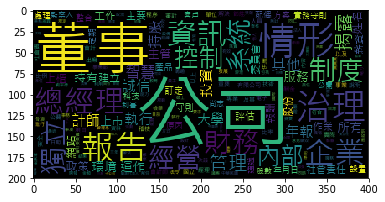

In [18]:
tfidf_dict1=dict(zip(df.words, df.doc1_count))
tfidf_dict1
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict1)
plt.imshow(wordcloud)


### doc2的dict建立文字雲

In [19]:
tfidf_dict2=dict(zip(df.words, df.doc2_count))
tfidf_dict2
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict2)
plt.imshow(wordcloud)

ZeroDivisionError: float division by zero

C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


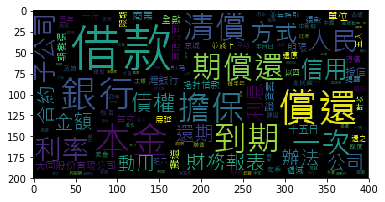

In [20]:
tfidf_dict3=dict(zip(df.words, df.doc3_count))
tfidf_dict3
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict3)
plt.imshow(wordcloud)

C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


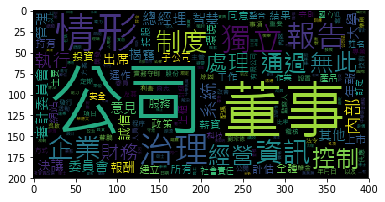

In [21]:
tfidf_dict4=dict(zip(df.words, df.doc4_count))
tfidf_dict4
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict4)
plt.imshow(wordcloud)

In [22]:
tfidf_dict5=dict(zip(df.words, df.doc5_count))
tfidf_dict5
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict5)
plt.imshow(wordcloud)

ZeroDivisionError: float division by zero